In [1]:
import matplotlib.pyplot as plt
import straph as sg
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In this section we will show how to use different methods, implemented in ``Straph``, to generate random stream graphs.

# Stream Graph Generators

Firstly, we must precise that the following methods may not be as intuitive as methods for random static graphs (Barabasi-Albert, Erdos-Renyi) but they are an adaptation for stream graphs.
The addition of a temporal dimension, continuous by nature, necessitate a mixture of continous random variable (coding nodes and links presence, for the temporal dimension) and discrete random variable (coding nodes and links occurence, for the structural dimension).

Our generators take the following parameters:

- ``T``: the time window of the stream graph
- ``nb_nodes``: number of nodes 
- ``occurence_param_node``: Occurence of a node (discrete variable)
- ``presence_param_node``: Node presence (continuous variable)
- ``occurence_param_link``: Occurence of a link (discrete variable)
- ``presence_param_link``: Link presence (continuous variable)

## Erdos Renyi

In [3]:
T = [0, 100]
nb_node = 21
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 3
presence_param_node = 25

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 5
presence_param_link = 15

As for static graphs, this model takes a single parameter ``p_link`` which is the probability that two nodes are connected.

In [4]:
p_link = numpy.sqrt(nb_node)/nb_node

In [5]:
S = sg.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
S.describe()

Nb of Nodes :  21
Nb of segmented nodes :  38.0
Nb of links :  47
Nb of segmented links :  84.0
Nb of event times :  175


To plot the stream graph we use Straph's custom function.

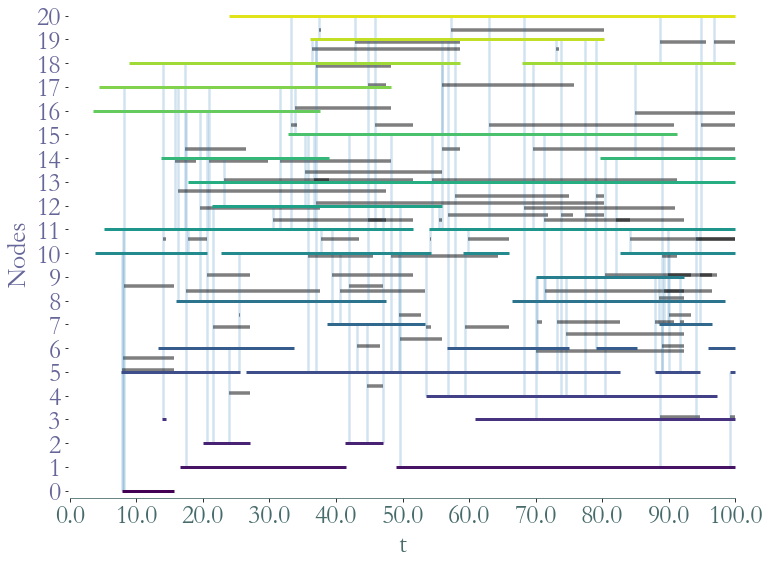

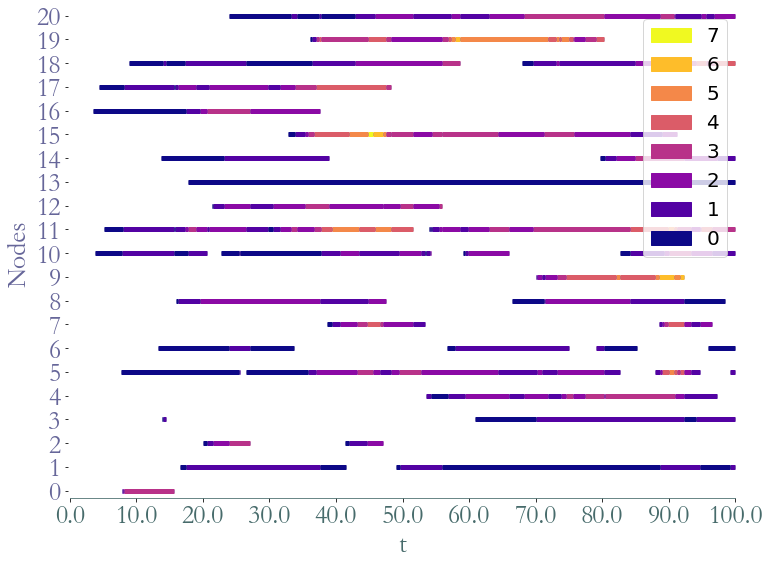

In [6]:
_ = S.plot()
_ = S.plot(clusters = S.degrees_partition(),plot_links=False)

### Degree distribution

In [7]:
T = [0, 1000]
nb_node = 3000
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 4
presence_param_node = 100

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 4
presence_param_link = 50


p_link = 2*numpy.sqrt(nb_node)/nb_node

S = sg.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)


If we observe the degree distribution of these random stream graph we observe the same distribution as in erdos-renyi static graphs.

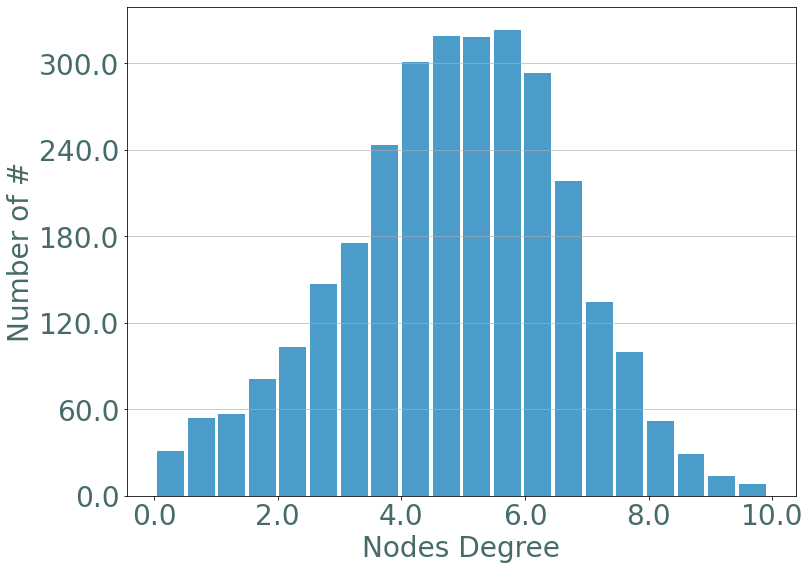

In [8]:
degrees = S.degrees()
_ = sg.hist_plot(list(degrees.values()), xlabel = "Nodes Degree", bins = 20)

If we plot the maximum instant degree we observe the same distribution as in erdos-renyi static graphs.

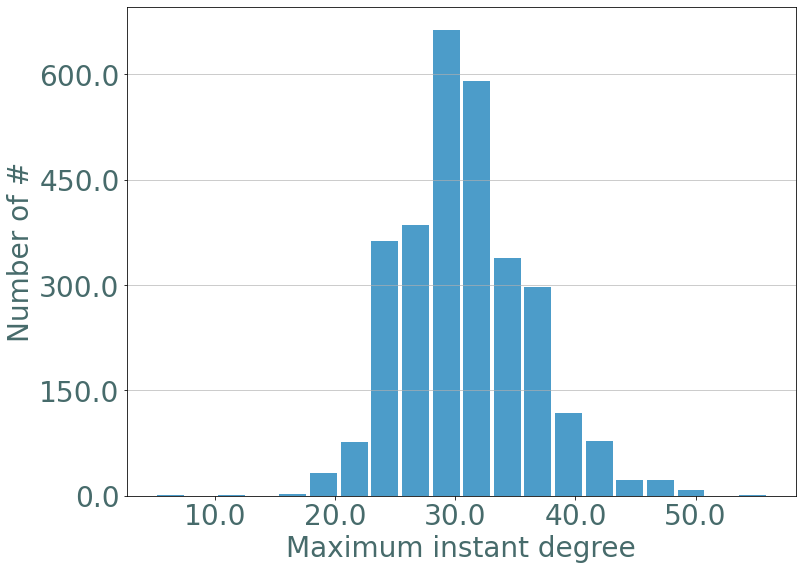

In [9]:
d_part = S.degrees_partition()
max_d = {}
for d, v in d_part.items():
    for u in v:
        max_d[u[2]] = d

_ = sg.hist_plot(list(max_d.values()), xlabel = "Maximum instant degree", bins = 20)

## Barabasi Albert

As in static graph our Barabasi-Albert takes two parameters ``m0`` the initial number of nodes and ``m`` the number of nodes that will be connected to a new node.

In [10]:
T = [0, 100]
nb_node = 21
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 3
presence_param_node = 25

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 5
presence_param_link = 15


m0 = 3
m = 3

In [11]:
S = sg.barabasi_albert(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    m0,
                    m)
S.describe()

Nb of Nodes :  21
Nb of segmented nodes :  35.0
Nb of links :  55
Nb of segmented links :  114.0
Nb of event times :  202


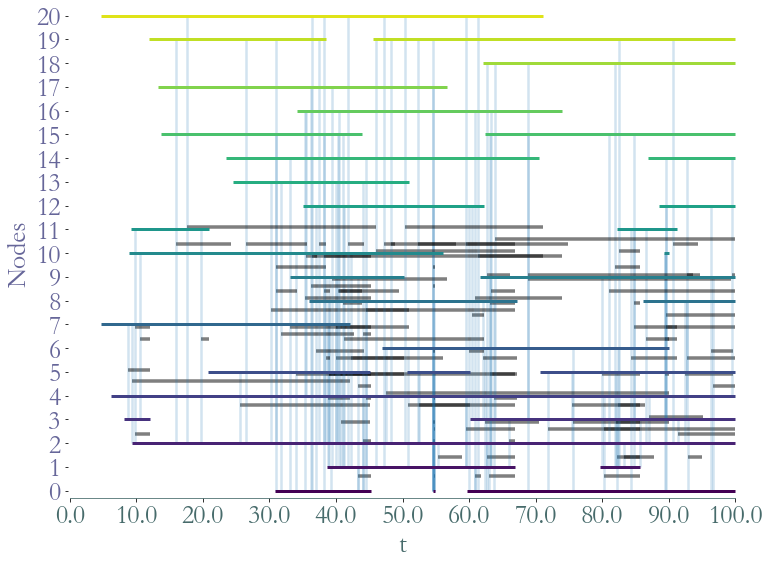

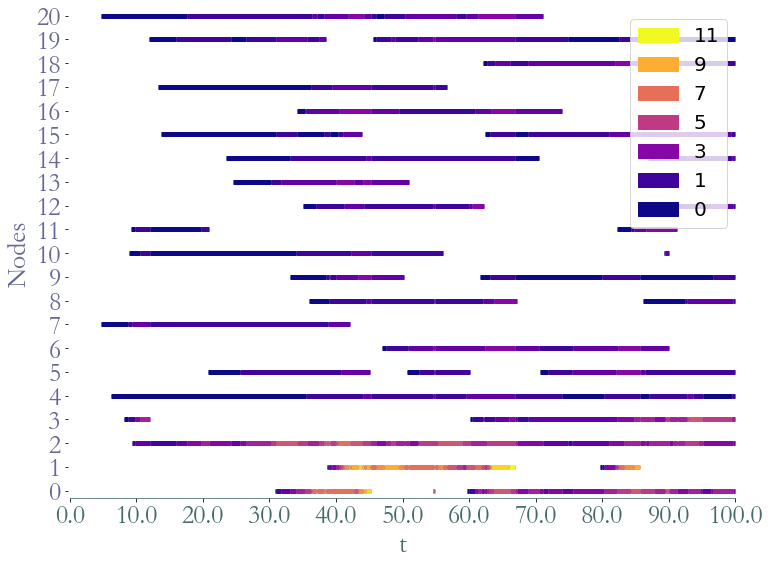

In [12]:
_ = S.plot()
_ = S.plot(clusters = S.degrees_partition(),plot_links=False)

### Degrees Distribution

In [13]:
T = [0, 1000]
nb_node = 2000
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 4
presence_param_node = 100

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 4
presence_param_link = 50


m0 = 10
m = 4

In [14]:
S = sg.barabasi_albert(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    m0,
                    m)
S.describe()

Nb of Nodes :  2000
Nb of segmented nodes :  5639.0
Nb of links :  6416
Nb of segmented links :  11356.0
Nb of event times :  24682


If we observe the degree distribution of these random stream graph we observe the same distribution as in barabasi-albert static graphs.

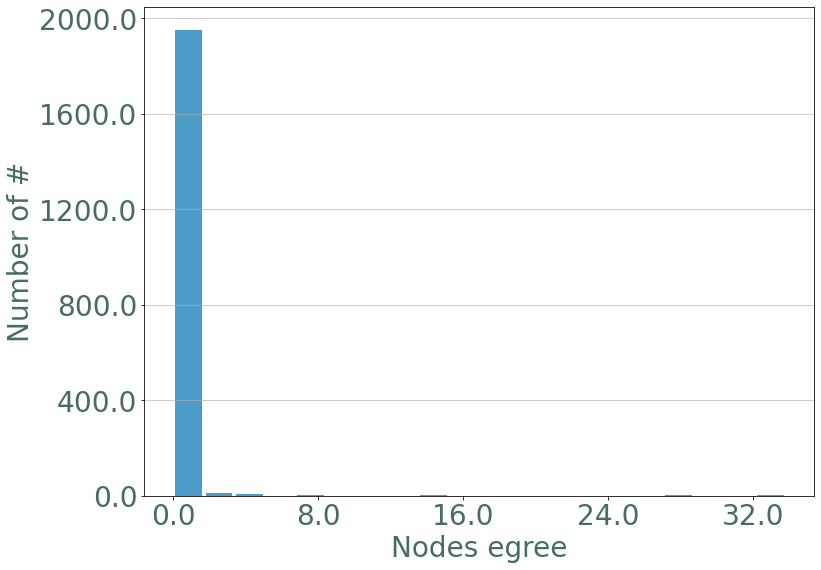

In [15]:
degrees = S.degrees()
_ = sg.hist_plot(list(degrees.values()), xlabel = "Nodes egree", bins = 20)

We add a logscale on the number of values:

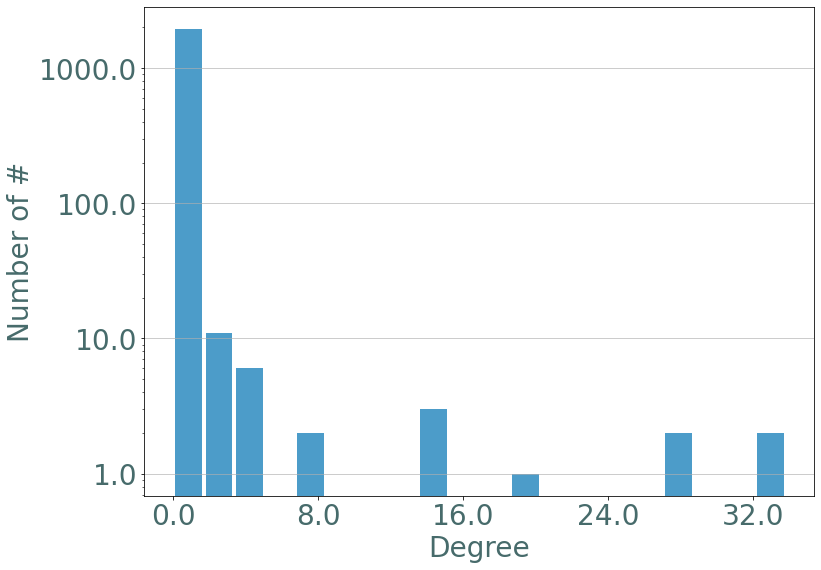

In [16]:
_ = sg.hist_plot(list(degrees.values()), xlabel = "Degree", bins = 20,ylog = True)

Similarly with the maximal instant degree:

<Figure size 864x648 with 0 Axes>

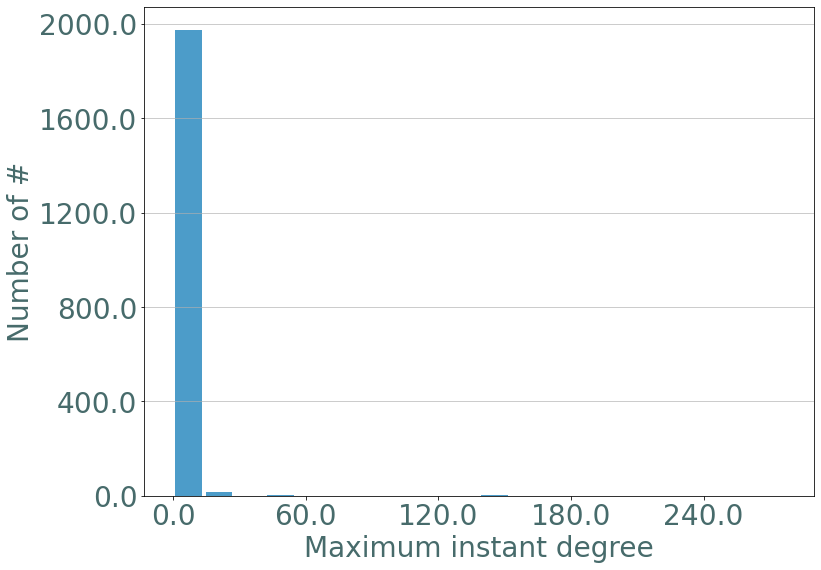

In [17]:
d_part = S.degrees_partition()
max_d = {}
for d, v in d_part.items():
    for u in v:
        max_d[u[2]] = d
fig = plt.figure()
_ = sg.hist_plot(list(max_d.values()), xlabel = "Maximum instant degree", bins = 20)

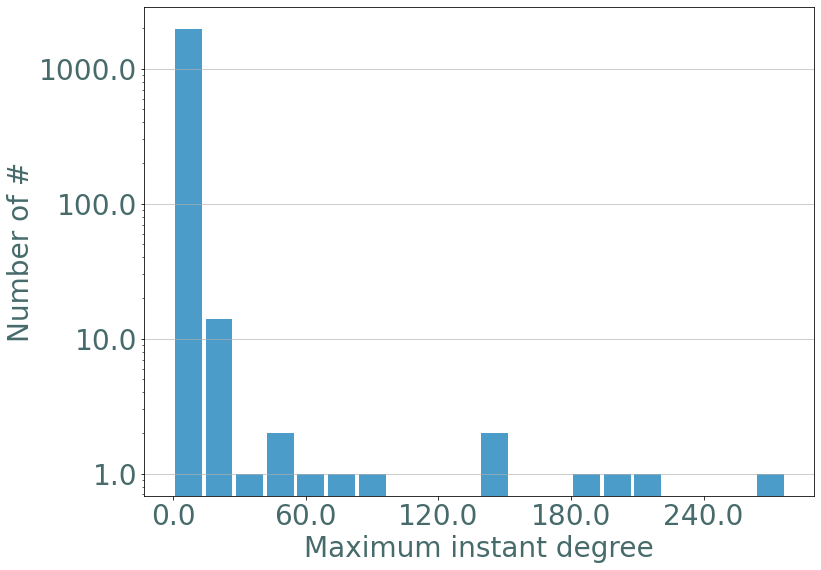

In [18]:
_ = sg.hist_plot(list(max_d.values()), xlabel = "Maximum instant degree", bins = 20, ylog = True)